In [26]:
import pandas as pd
import matplotlib.pyplot as plt
ratings = pd.read_csv('C:/Users/regi_/Downloads/movie_ratings.csv').set_index("Movie")
ratings

,Brandon,Emily,Cleo,Rusty,Samantha
Movie,,,,,
Aquaman,4,1,2,2,2
Avengers: Infinity War,2,5,2,5,5
Black Panther,5,2,5,1,1
Bohemian Rhapsody,2,3,4,4,1
Deadpool 2,3,2,4,5,1
Fantastic Beasts: The Crimes of Grindelwald,5,4,1,2,5
Incredibles 2,4,2,3,4,4
Jurassic World: Fallen Kingdom,2,3,5,4,5
Mission: Impossible – Fallout,5,5,4,3,2


In [27]:
def ratings_scatter(movie1, movie2):
    x = ratings.T[movie1]
    y = ratings.T[movie2]
    n = list(ratings.T.index)

    fig, ax = plt.subplots()
    ax.scatter(x, y, s=0)
    fig.set_figwidth(12)
    fig.set_figheight(8)
    plt.title("Preference Space for "+ movie1 + " vs. " + movie2, fontsize=20)
    ax.set_xlabel(movie1, fontsize=16)
    ax.set_ylabel(movie2, fontsize=16) 

    for i, txt in enumerate(n):
        ax.annotate(txt, (x[i], y[i]), fontsize=12)

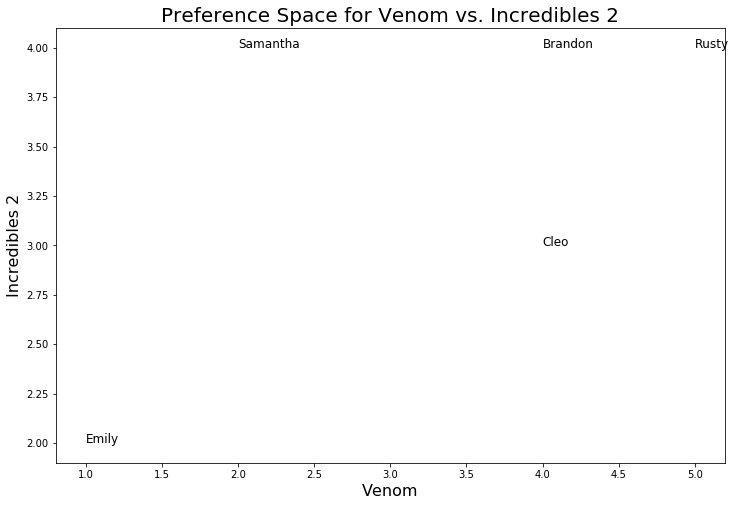

In [28]:
ratings_scatter('Venom', 'Incredibles 2')


In [29]:
from scipy.spatial.distance import pdist, squareform

squareform(pdist(ratings.T, 'euclidean'))

array([[0.        , 6.63324958, 6.        , 7.41619849, 7.48331477],
       [6.63324958, 0.        , 6.92820323, 6.40312424, 5.09901951],
       [6.        , 6.92820323, 0.        , 5.56776436, 8.24621125],
       [7.41619849, 6.40312424, 5.56776436, 0.        , 6.70820393],
       [7.48331477, 5.09901951, 8.24621125, 6.70820393, 0.        ]])

In [30]:
distances = pd.DataFrame(1/(1 + squareform(pdist(ratings.T, 'euclidean'))), 
                         index=ratings.columns, columns=ratings.columns)

distances


,Brandon,Emily,Cleo,Rusty,Samantha
Brandon,1.000000,0.131006,0.142857,0.118818,0.117878
Emily,0.131006,1.000000,0.126132,0.135078,0.163961
Cleo,0.142857,0.126132,1.000000,0.152259,0.108152
Rusty,0.118818,0.135078,0.152259,1.000000,0.129732
Samantha,0.117878,0.163961,0.108152,0.129732,1.000000


In [38]:
tom = {'Aquaman': 2,
 'Avengers: Infinity War': 1,
 'Black Panther': 5,
 'Bohemian Rhapsody': 5,
 'Deadpool 2': 2,
 'Fantastic Beasts: The Crimes of Grindelwald': 3,
 'Incredibles 2': 3,
 'Jurassic World: Fallen Kingdom': 4,
 'Mission: Impossible – Fallout': 3,
 'Venom': 3}

In [39]:
ratings['Tom'] = pd.Series(tom)

distances = pd.DataFrame(1/(1 + squareform(pdist(ratings.T, 'euclidean'))), 
                         index=ratings.columns, columns=ratings.columns)

distances


,Brandon,Emily,Cleo,Rusty,Samantha,Tom
Brandon,1.000000,0.131006,0.142857,0.118818,0.117878,0.156613
Emily,0.131006,1.000000,0.126132,0.135078,0.163961,0.135078
Cleo,0.142857,0.126132,1.000000,0.152259,0.108152,0.217129
Rusty,0.118818,0.135078,0.152259,1.000000,0.129732,0.126132
Samantha,0.117878,0.163961,0.108152,0.129732,1.000000,0.116961
Tom,0.156613,0.135078,0.217129,0.126132,0.116961,1.000000


In [40]:
similarities = distances['Tom'].sort_values(ascending=False)[1:]
similarities

Cleo        0.217129
Brandon     0.156613
Emily       0.135078
Rusty       0.126132
Samantha    0.116961
Name: Tom, dtype: float64

In [41]:
new_ratings = pd.read_csv('C:/Users/regi_/Downloads/movie_ratings2.csv').set_index("Movie")

In [42]:
new_ratings

,Brandon,Emily,Cleo,Rusty,Samantha
Movie,,,,,
Beauty and the Beast,2,5,2,5,2
Despicable Me 3,4,5,5,1,2
Guardians of the Galaxy Vol. 2,4,1,5,4,2
Jumanji: Welcome to the Jungle,4,3,3,2,5
Spider-Man: Homecoming,1,3,5,2,5
Star Wars: The Last Jedi,5,4,1,2,2
The Fate of the Furious,2,1,3,3,3
Thor: Ragnarok,4,3,4,1,5
Wolf Warrior 2,5,3,2,3,4


In [43]:
recommendations = new_ratings.copy()

In [44]:
for name, score in dict(similarities).items():
    recommendations[name] = recommendations[name] * score

recommendations['Total'] = recommendations.sum(axis=1)
recommendations.sort_values('Total', ascending=False)

,Brandon,Emily,Cleo,Rusty,Samantha,Total
Movie,,,,,,
Despicable Me 3,0.626452,0.675391,1.085646,0.126132,0.233923,2.747544
Wonder Woman,0.626452,0.405234,0.868517,0.378396,0.467845,2.746445
Thor: Ragnarok,0.626452,0.405234,0.868517,0.126132,0.584807,2.611142
Guardians of the Galaxy Vol. 2,0.626452,0.135078,1.085646,0.504528,0.233923,2.585627
Jumanji: Welcome to the Jungle,0.626452,0.405234,0.651388,0.252264,0.584807,2.520145
Spider-Man: Homecoming,0.156613,0.405234,1.085646,0.252264,0.584807,2.484564
Wolf Warrior 2,0.783065,0.405234,0.434259,0.378396,0.467845,2.468799
Beauty and the Beast,0.313226,0.675391,0.434259,0.630660,0.233923,2.287458
Star Wars: The Last Jedi,0.783065,0.540312,0.217129,0.252264,0.233923,2.026693


In [45]:
similarities

Cleo        0.217129
Brandon     0.156613
Emily       0.135078
Rusty       0.126132
Samantha    0.116961
Name: Tom, dtype: float64